Fraction of the 3rd body mass to Moon mass: 0.9
Starting 3rd body to Earth distance as a fraction of the Moon-Earth distance: 0.9


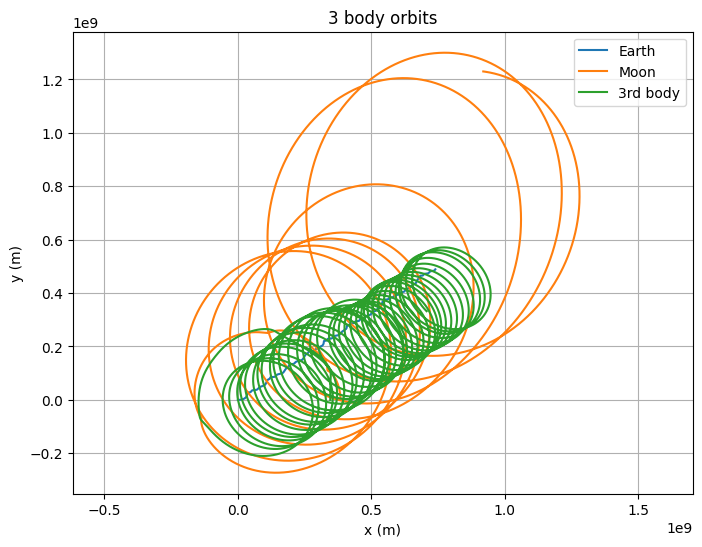

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430*10**(-11) # Gravitational constant (N*m^2/kg^2)
dt = 100  #

# Mass definition
m1 = 5.972e24  # Earth mass (kg)
m2 = 7.342e22  # Moon mass (kg)

x = float(input("Fraction of the 3rd body mass to Moon mass: ")); m3=x*m2
f = float(input("Starting 3rd body to Earth distance as a fraction of the Moon-Earth distance: "))

# Starting positions and velocities
r1 = np.array([0.0, 0.0])
r2 = np.array([3.844e8, 0.0])  # Moon-Earth distance
r3 = np.array([f*3.844e8,0.0])      # 3rd body distance to Earth

v1 = np.array([30.0, 0.0])   # Earth's orbital velocity
v2 = np.array([0.0, 1022.0])  # Moon's orbital velocity
v3 = np.array([0.0, 700.0])  # 3rd body's orbital velocity

# Defining Acceleration Functions from gravity
def acceleration(r1, r2, m2):
    r = r2 - r1
    return G * m2 / np.linalg.norm(r)**3 * r

# Simulation Loop
steps = 250000
positions1 = np.zeros((steps, 2))
positions2 = np.zeros((steps, 2))
positions3 = np.zeros((steps, 2))

for i in range(steps):
    # Accelerations calculus
    a1 = acceleration(r1, r2, m2) + acceleration(r1, r3, m3)
    a2 = acceleration(r2, r1, m1) + acceleration(r2, r3, m3)
    a3 = acceleration(r3, r1, m1) + acceleration(r3, r2, m2)

    # Velocities calculus
    v1 += a1 * dt
    v2 += a2 * dt
    v3 += a3 * dt

    # Positions calculus
    r1 += v1 * dt
    r2 += v2 * dt
    r3 += v3 * dt

    # Positions storage for graphing
    positions1[i] = r1
    positions2[i] = r2
    positions3[i] = r3

# Trajectories Graphic
plt.figure(figsize=(8, 6))
plt.plot(positions1[:, 0], positions1[:, 1], label='Earth')
plt.plot(positions2[:, 0], positions2[:, 1], label='Moon')
plt.plot(positions3[:, 0], positions3[:, 1], label='3rd body')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('3 body orbits')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

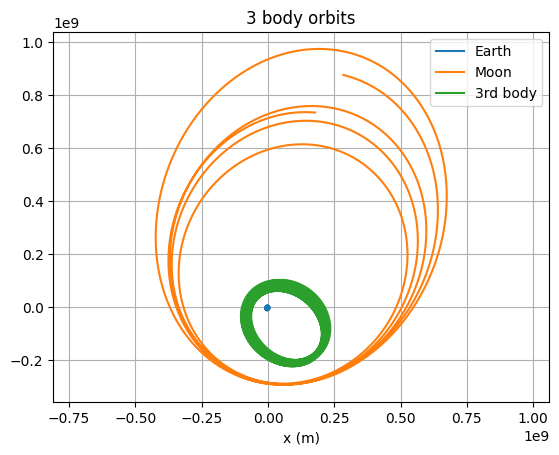

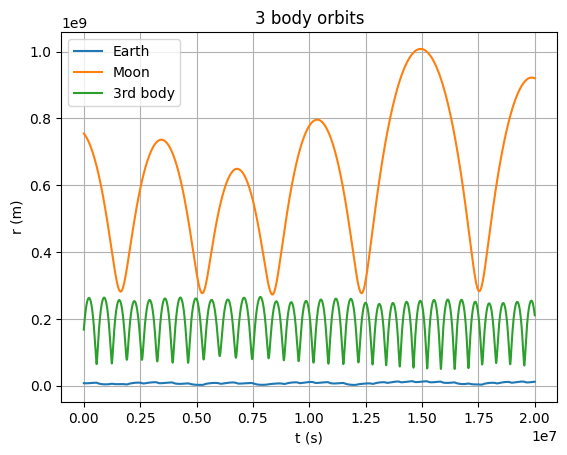

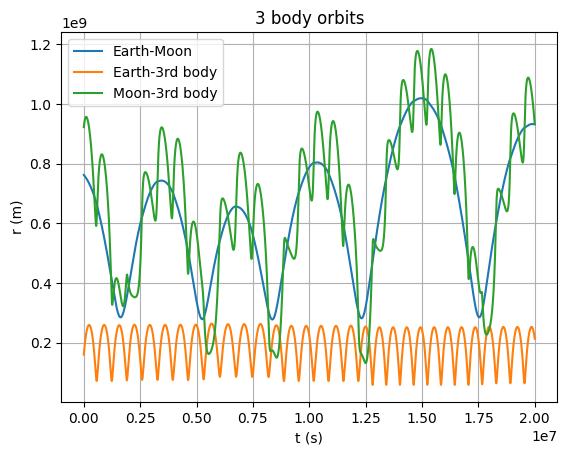

In [5]:
# Shift to center of mass frame
V = (m1*v1 + m2*v2 + m3*v3) / (m1 + m2 + m3)
v1 -= V
v2 -= V
v3 -= V

R = (m1*r1 + m2*r2 + m3*r3) / (m1 + m2 + m3)
r1 -= R
r2 -= R
r3 -= R

# Simulation Loop
steps = 200000
positions1 = np.zeros((steps, 2))
positions2 = np.zeros((steps, 2))
positions3 = np.zeros((steps, 2))
time = np.zeros(steps)

t = 0
for i in range(steps):
    # Accelerations calculus
    a1 = acceleration(r1, r2, m2) + acceleration(r1, r3, m3)
    a2 = acceleration(r2, r1, m1) + acceleration(r2, r3, m3)
    a3 = acceleration(r3, r1, m1) + acceleration(r3, r2, m2)

    # Velocities calculus
    v1 += a1 * dt
    v2 += a2 * dt
    v3 += a3 * dt

    # Positions calculus
    r1 += v1 * dt
    r2 += v2 * dt
    r3 += v3 * dt
    t += dt

    # Positions storage for graphing
    positions1[i] = r1
    positions2[i] = r2
    positions3[i] = r3
    time[i] = t

# Trajectories Graphic
# plt.figure(figsize=(8, 6))

# Plot x-y positions
plt.plot(positions1[:, 0], positions1[:, 1], label='Earth')
plt.plot(positions2[:, 0], positions2[:, 1], label='Moon')
plt.plot(positions3[:, 0], positions3[:, 1], label='3rd body')
plt.axis('equal')
plt.xlabel('x (m)')
# plt.ylabel('y (m)')
plt.grid(True)
plt.title('3 body orbits')
plt.legend()
plt.show()

# Plot distance from center as a function of time
plt.plot(time, np.linalg.norm(positions1, axis=1), label='Earth')
plt.plot(time, np.linalg.norm(positions2, axis=1), label='Moon')
plt.plot(time, np.linalg.norm(positions3, axis=1), label='3rd body')
# plt.axis([None, None, 0, 3.844e8*10])
plt.xlabel('t (s)')
plt.ylabel('r (m)')
plt.grid(True)
plt.title('3 body orbits')
plt.legend()
plt.show()

# Plot pair distances as a function of time
plt.plot(time, np.linalg.norm(positions1-positions2, axis=1), label='Earth-Moon')
plt.plot(time, np.linalg.norm(positions1-positions3, axis=1), label='Earth-3rd body')
plt.plot(time, np.linalg.norm(positions3-positions2, axis=1), label='Moon-3rd body')
# plt.axis([None, None, 0, 3.844e8*10])
plt.xlabel('t (s)')
plt.ylabel('r (m)')
plt.grid(True)
plt.title('3 body orbits')
plt.legend()
plt.show()